In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.ticker import FuncFormatter

In [ ]:
#gather UChicago data
uc = pd.read_csv('UC.azurify.tsv', sep='\t')
uc['KEY'] = uc['CHROM'] + ':' + uc['POS'].astype(str) + ':' + uc['REF'] + ':' + uc['ALT']

# merge back with the original classifications
uc_full = pd.read_csv('Cases_For_Penn_Full.csv', sep=',')
uc_full['KEY'] = ('chr' + uc_full['chr']) + ':' + uc_full['pos'].astype(str) + ':' + uc_full['ref'] + ':' + uc_full['alt']
uc_full = uc_full.rename(columns={'Pathogenic rating': 'UC_CATEGORIZATION'})
ucm = uc_full[['KEY', 'UC_CATEGORIZATION']]

uc_az = pd.merge(uc, ucm, on='KEY', how='left')
uc_az.drop_duplicates(inplace=True)


In [ ]:
#convert the UChicago classifications from numerical to categorical
uc_az['UC_CATEGORIZATION'] = uc_az['UC_CATEGORIZATION'].replace({1: 'Pathogenic', 2: 'Likely Pathogenic', 3: 'VUS'})
uc_az['UC_CATEGORIZATION'] = uc_az['UC_CATEGORIZATION'].fillna('Benign')


In [ ]:
# figure size in inches
rcParams['figure.figsize'] = 14,10
plt.rcParams['font.size'] = 16
plt.rcParams["font.family"] = "Arial"
df = pd.DataFrame(uc_az, columns=['UC_CATEGORIZATION','Pathogenicity'])
df.sort_values(by=['UC_CATEGORIZATION'])
fmt = lambda x,pos: '{:.0%}'.format(x)
confusion_matrix = pd.crosstab(df['UC_CATEGORIZATION'], df['Pathogenicity'], rownames=['UC\n'], colnames=['\nAzurify']).apply(lambda r: r/r.sum(), axis=1)
res=sns.heatmap(confusion_matrix,annot=True, 
          fmt=".2%", cmap="Blues", cbar=False,square=True,  linewidths=0.1, linecolor='black')
for _, spine in res.spines.items():
    spine.set_visible(True)
cbar = res.figure.colorbar(res.collections[0])
cbar.set_ticks([0, 1])
cbar.set_ticklabels(["0%", "100%"])
plt.yticks(rotation=0)
plt.savefig('UC_all.pdf',bbox_inches='tight',dpi=600)
plt.show()

In [ ]:
#UChicago AML only
uc_aml  = uc_az[uc_az['DIAGNOSIS'] == 'Acute Myeloid Leukemia']
# figure size in inches
rcParams['figure.figsize'] = 14,10
plt.rcParams['font.size'] = 16
plt.rcParams["font.family"] = "Arial"
df = pd.DataFrame(uc_aml, columns=['UC_CATEGORIZATION','Pathogenicity'])
df.sort_values(by=['UC_CATEGORIZATION'])
fmt = lambda x,pos: '{:.0%}'.format(x)
confusion_matrix = pd.crosstab(df['UC_CATEGORIZATION'], df['Pathogenicity'], rownames=['UC AML\n'], colnames=['\nAzurify']).apply(lambda r: r/r.sum(), axis=1)
res=sns.heatmap(confusion_matrix,annot=True, 
          fmt=".2%", cmap="Blues", cbar=False,square=True,  linewidths=0.1, linecolor='black')
for _, spine in res.spines.items():
    spine.set_visible(True)
cbar = res.figure.colorbar(res.collections[0])
cbar.set_ticks([0, 1])
cbar.set_ticklabels(["0%", "100%"])
plt.yticks(rotation=0)
#plt.savefig('UC_aml.pdf',bbox_inches='tight',dpi=600)
plt.show()

In [ ]:
#UChicago Lung only
uc_lung  = uc_az[uc_az['DIAGNOSIS'] == 'Lung Adenocarcinoma']
# figure size in inches
rcParams['figure.figsize'] = 14,10
plt.rcParams['font.size'] = 16
plt.rcParams["font.family"] = "Arial"
df = pd.DataFrame(uc_lung, columns=['UC_CATEGORIZATION','Pathogenicity'])
df.sort_values(by=['UC_CATEGORIZATION'])
fmt = lambda x,pos: '{:.0%}'.format(x)
confusion_matrix = pd.crosstab(df['UC_CATEGORIZATION'], df['Pathogenicity'], rownames=['UC Lung\n'], colnames=['\nAzurify']).apply(lambda r: r/r.sum(), axis=1)
res=sns.heatmap(confusion_matrix,annot=True, 
          fmt=".2%", cmap="Blues", cbar=False,square=True,  linewidths=0.1, linecolor='black')
for _, spine in res.spines.items():
    spine.set_visible(True)
cbar = res.figure.colorbar(res.collections[0])
cbar.set_ticks([0, 1])
cbar.set_ticklabels(["0%", "100%"])
plt.yticks(rotation=0)
#plt.savefig('UC_lung.pdf',bbox_inches='tight',dpi=600)
plt.show()

In [ ]:
uab_aml = pd.read_csv('UAB.aml.azurify.tsv', sep='\t')

In [ ]:
# figure size in inches
rcParams['figure.figsize'] = 14,10
plt.rcParams['font.size'] = 16
plt.rcParams["font.family"] = "Arial"
df = pd.DataFrame(uab_aml, columns=['UAB_CATEGORIZATION','Pathogenicity'])
df.replace(['Disease Associated', 'Probably DA', 'VOUS'], ['Pathogenic', 'Likely Pathogenic', 'VUS'], inplace=True)
df.sort_values(by=['UAB_CATEGORIZATION'])
fmt = lambda x,pos: '{:.0%}'.format(x)
confusion_matrix = pd.crosstab(df['UAB_CATEGORIZATION'], df['Pathogenicity'], rownames=['UAB AML\n'], colnames=['\nAzurify']).apply(lambda r: r/r.sum(), axis=1)
res=sns.heatmap(confusion_matrix,annot=True, 
          fmt=".2%", cmap="Blues", cbar=False,square=True,  linewidths=0.1, linecolor='black')
for _, spine in res.spines.items():
    spine.set_visible(True)
cbar = res.figure.colorbar(res.collections[0])
cbar.set_ticks([0, 1])
cbar.set_ticklabels(["0%", "100%"])
plt.yticks(rotation=0)
plt.savefig('UAB_aml.pdf',bbox_inches='tight',dpi=600)
plt.show()

In [ ]:
uab_lung = pd.read_csv('UAB.lung.azurify.tsv', sep='\t')

In [ ]:
# figure size in inches
rcParams['figure.figsize'] = 14,10
plt.rcParams['font.size'] = 16
plt.rcParams["font.family"] = "Arial"
df = pd.DataFrame(uab_lung, columns=['UAB_CATEGORIZATION','Pathogenicity'])
df.replace(['Disease Associated', 'Probably DA', 'VOUS'], ['Pathogenic', 'Likely Pathogenic', 'VUS'], inplace=True)
df.sort_values(by=['UAB_CATEGORIZATION'])
fmt = lambda x,pos: '{:.0%}'.format(x)
confusion_matrix = pd.crosstab(df['UAB_CATEGORIZATION'], df['Pathogenicity'], rownames=['UAB Lung\n'], colnames=['\nAzurify']).apply(lambda r: r/r.sum(), axis=1)
res=sns.heatmap(confusion_matrix,annot=True, 
          fmt=".2%", cmap="Blues", cbar=False,square=True,  linewidths=0.1, linecolor='black')
for _, spine in res.spines.items():
    spine.set_visible(True)
cbar = res.figure.colorbar(res.collections[0])
cbar.set_ticks([0, 1])
cbar.set_ticklabels(["0%", "100%"])
plt.yticks(rotation=0)
#plt.savefig('UAB_lung.pdf',bbox_inches='tight',dpi=600)
plt.show()

In [6]:
uab_aml['DIAGNOSIS'] = 'Acute Myeloid Leukemia'
uab_lung['DIAGNOSIS'] = 'Lung Adenocarcinoma'
uab_all = pd.concat([uab_aml, uab_lung])

In [17]:
uab_lung_genes = uab_lung['GENE'].unique()
uab_aml_genes = uab_aml['GENE'].unique()
uc_lung_genes = uc_lung['GENE'].unique()
uab_aml_genes = uab_aml['GENE'].unique()

In [19]:
import pandas as pd

# Sample lists
uab_lung_genes = uab_lung['GENE'].unique()
uc_lung_genes = uc_lung['GENE'].unique()
uab_aml_genes = uab_aml['GENE'].unique()
uc_aml_genes = uc_aml['GENE'].unique()

# Convert lists to sets
uab_lung_set = set(uab_lung_genes)
uc_lung_set = set(uc_lung_genes)
uab_aml_set = set(uab_aml_genes)
uc_aml_set = set(uc_aml_genes)

# Find mutual and exclusive genes for lung
mutual_lung_genes = list(uab_lung_set.intersection(uc_lung_set))
uab_exclusive_lung_genes = list(uab_lung_set.difference(uc_lung_set))
uc_exclusive_lung_genes = list(uc_lung_set.difference(uab_lung_set))

# Find mutual and exclusive genes for AML
mutual_aml_genes = list(uab_aml_set.intersection(uc_aml_set))
uab_exclusive_aml_genes = list(uab_aml_set.difference(uc_aml_set))
uc_exclusive_aml_genes = list(uc_aml_set.difference(uab_aml_set))

# Determine the maximum length of the lists
max_length = max(len(mutual_lung_genes), len(uab_exclusive_lung_genes), len(uc_exclusive_lung_genes),
                 len(mutual_aml_genes), len(uab_exclusive_aml_genes), len(uc_exclusive_aml_genes))

# Pad the shorter lists with None values
mutual_lung_genes.extend([None] * (max_length - len(mutual_lung_genes)))
uab_exclusive_lung_genes.extend([None] * (max_length - len(uab_exclusive_lung_genes)))
uc_exclusive_lung_genes.extend([None] * (max_length - len(uc_exclusive_lung_genes)))
mutual_aml_genes.extend([None] * (max_length - len(mutual_aml_genes)))
uab_exclusive_aml_genes.extend([None] * (max_length - len(uab_exclusive_aml_genes)))
uc_exclusive_aml_genes.extend([None] * (max_length - len(uc_exclusive_aml_genes)))

# Create a DataFrame
df = pd.DataFrame({
    'UAB_Lung_Genes': uab_lung_genes,
    'UC_Lung_Genes': uc_lung_genes,
    'Mutual_Lung_Genes': mutual_lung_genes,
    'UAB_Exclusive_Lung_Genes': uab_exclusive_lung_genes,
    'UC_Exclusive_Lung_Genes': uc_exclusive_lung_genes,
    'UAB_AML_Genes': uab_aml_genes,
    'UC_AML_Genes': uc_aml_genes,
    'Mutual_AML_Genes': mutual_aml_genes,
    'UAB_Exclusive_AML_Genes': uab_exclusive_aml_genes,
    'UC_Exclusive_AML_Genes': uc_exclusive_aml_genes
})

# Save the DataFrame as a tab-delimited file
df.to_csv('gene_comparison_results.tsv', sep='\t', index=False)

In [13]:
# compare UAB and UChicago
uab_sub = uab_all[['KEY', 'GENE', 'PCHANGE', 'DIAGNOSIS', 'UAB_CATEGORIZATION', 'Pathogenicity', 'FAF']]

In [14]:
uc_sub = uc_az[['KEY', 'GENE', 'PCHANGE', 'DIAGNOSIS', 'UC_CATEGORIZATION', 'Pathogenicity', 'FAF']] 


In [ ]:
uc_uab = pd.merge(uc_sub, uab_sub, on='KEY', how='inner')


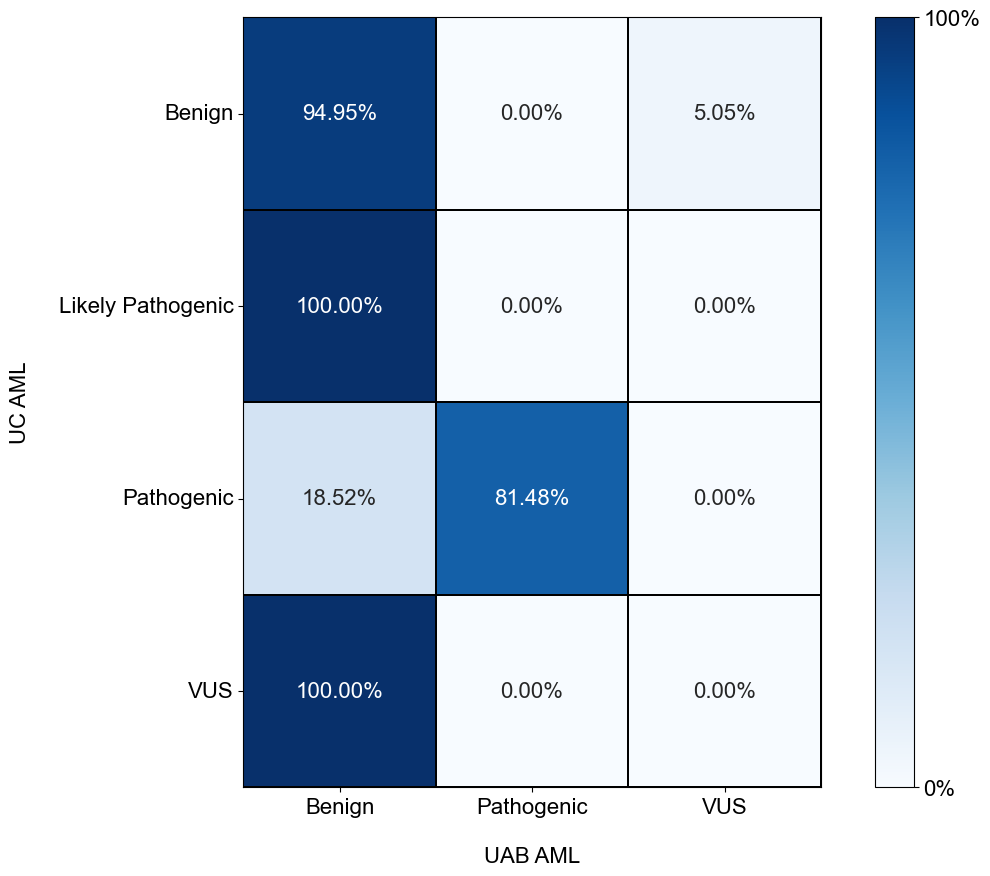

In [16]:
# figure size in inches
uc_uab_aml = uc_uab[(uc_uab['DIAGNOSIS_x'] == 'Acute Myeloid Leukemia') & (uc_uab['DIAGNOSIS_y'] == 'Acute Myeloid Leukemia')]
len(uc_uab_aml)
rcParams['figure.figsize'] = 14,10
plt.rcParams['font.size'] = 16
plt.rcParams["font.family"] = "Arial"
df = pd.DataFrame(uc_uab_aml, columns=['UC_CATEGORIZATION','UAB_CATEGORIZATION'])
#df.replace(['Likely Pathogenic'], ['Pathogenic'], inplace=True)
df.sort_values(by=['UC_CATEGORIZATION'])
fmt = lambda x,pos: '{:.0%}'.format(x)
confusion_matrix = pd.crosstab(df['UC_CATEGORIZATION'], df['UAB_CATEGORIZATION'], rownames=['UC AML\n'], colnames=['\nUAB AML']).apply(lambda r: r/r.sum(), axis=1)
res=sns.heatmap(confusion_matrix,annot=True, 
          fmt=".2%", cmap="Blues", cbar=False,square=True,  linewidths=0.1, linecolor='black')
for _, spine in res.spines.items():
    spine.set_visible(True)
cbar = res.figure.colorbar(res.collections[0])
cbar.set_ticks([0, 1])
cbar.set_ticklabels(["0%", "100%"])
plt.yticks(rotation=0)
#plt.savefig('UC_UAB_aml.pdf',bbox_inches='tight',dpi=600)
plt.show()

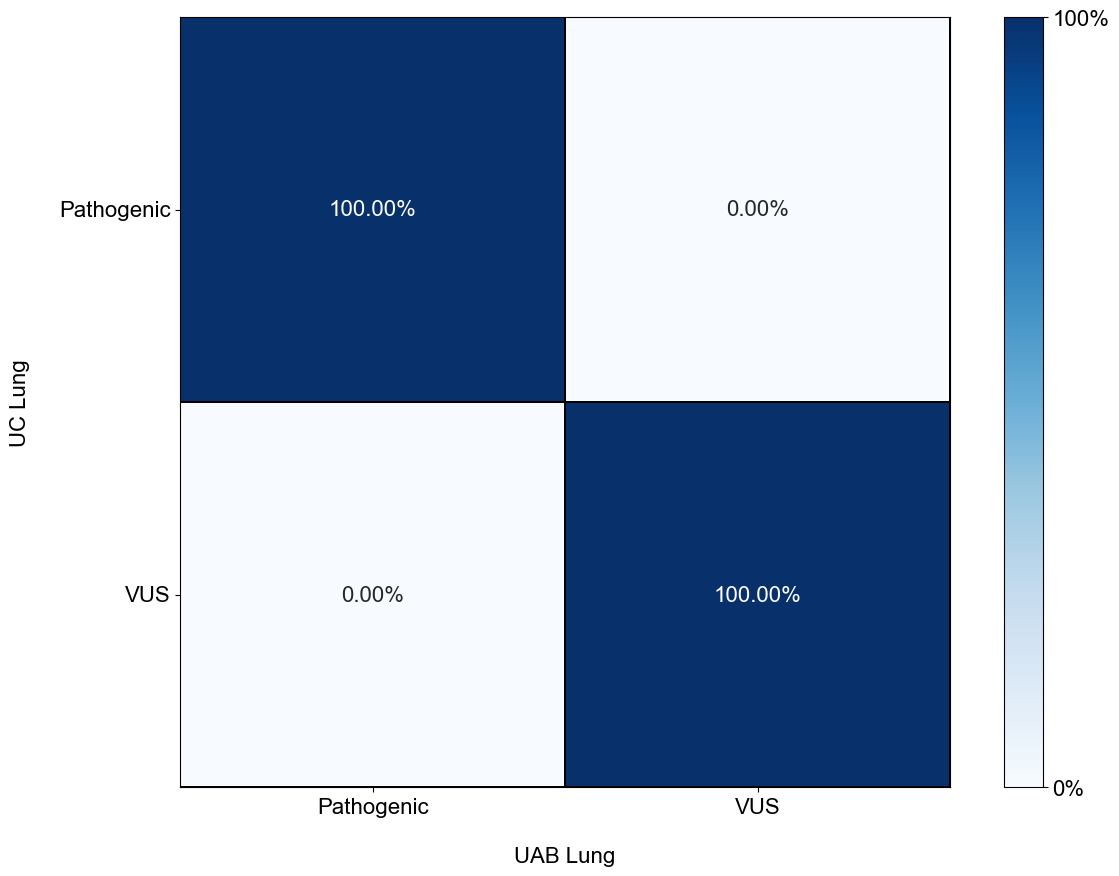

In [18]:
# figure size in inches
uc_uab_lung = uc_uab[(uc_uab['DIAGNOSIS_x'] == 'Lung Adenocarcinoma') & (uc_uab['DIAGNOSIS_y'] == 'Lung Adenocarcinoma')]
rcParams['figure.figsize'] = 14,10
plt.rcParams['font.size'] = 16
plt.rcParams["font.family"] = "Arial"
df = pd.DataFrame(uc_uab_lung, columns=['UC_CATEGORIZATION','UAB_CATEGORIZATION'])
#df.replace(['Likely Pathogenic'], ['Pathogenic'], inplace=True)
df.sort_values(by=['UC_CATEGORIZATION'])
fmt = lambda x,pos: '{:.0%}'.format(x)
confusion_matrix = pd.crosstab(df['UC_CATEGORIZATION'], df['UAB_CATEGORIZATION'], rownames=['UC Lung\n'], colnames=['\nUAB Lung']).apply(lambda r: r/r.sum(), axis=1)
res=sns.heatmap(confusion_matrix,annot=True, 
          fmt=".2%", cmap="Blues", cbar=False,square=True,  linewidths=0.1, linecolor='black')
for _, spine in res.spines.items():
    spine.set_visible(True)
cbar = res.figure.colorbar(res.collections[0])
cbar.set_ticks([0, 1])
cbar.set_ticklabels(["0%", "100%"])
plt.yticks(rotation=0)
#plt.savefig('UC_UAB_lung.pdf',bbox_inches='tight',dpi=600)
plt.show()

In [ ]:
#overall aml and lung
uc1 = uc_lung.rename(columns={'UC_CATEGORIZATION': 'EXT_CATEGORIZATION'})
uab1 = uab_lung.rename(columns={'UAB_CATEGORIZATION': 'EXT_CATEGORIZATION'})
lung = pd.concat([uc1, uab1])


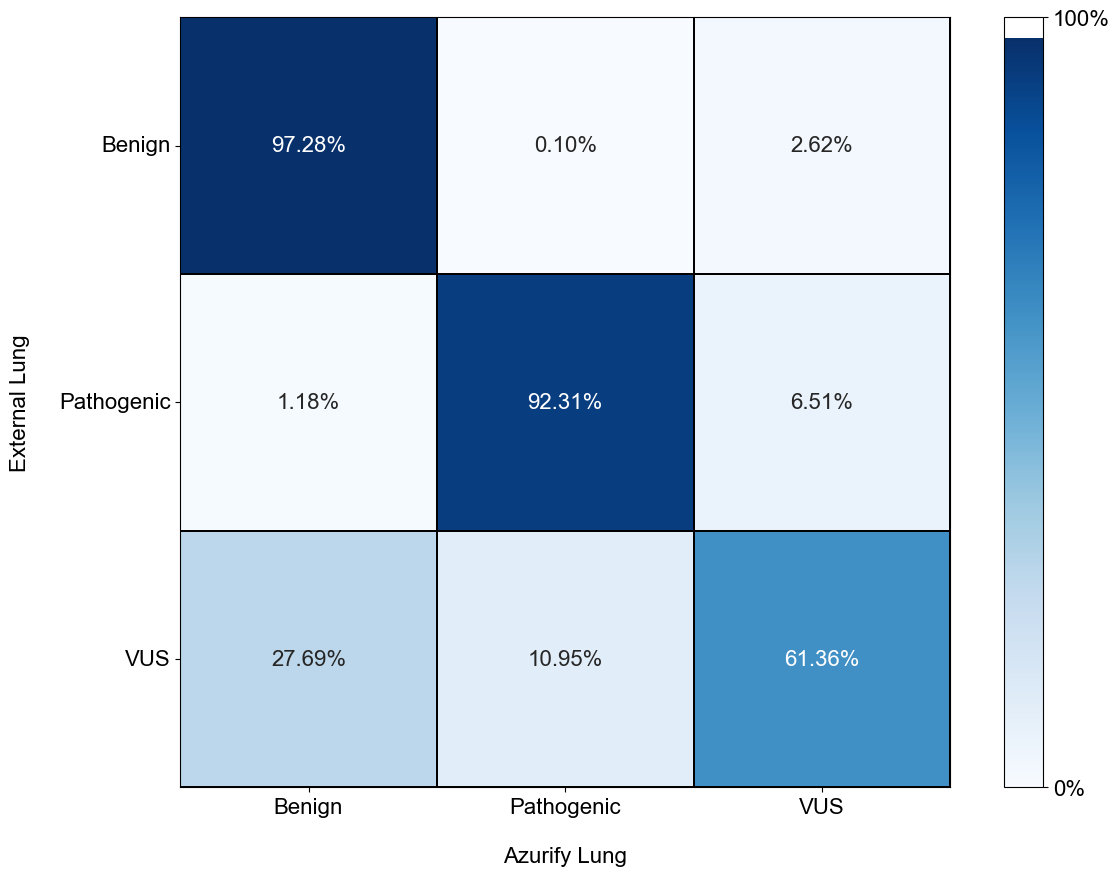

In [166]:
# figure size in inches
rcParams['figure.figsize'] = 14,10
plt.rcParams['font.size'] = 16
plt.rcParams["font.family"] = "Arial"
df = pd.DataFrame(lung, columns=['EXT_CATEGORIZATION','Pathogenicity'])
df.replace(['Likely Pathogenic', 'Likely Benign'], ['Pathogenic', 'Benign'], inplace=True)
df.sort_values(by=['EXT_CATEGORIZATION'])
fmt = lambda x,pos: '{:.0%}'.format(x)
confusion_matrix = pd.crosstab(df['EXT_CATEGORIZATION'], df['Pathogenicity'], rownames=['External Lung\n'], colnames=['\nAzurify Lung']).apply(lambda r: r/r.sum(), axis=1)
res=sns.heatmap(confusion_matrix,annot=True, 
          fmt=".2%", cmap="Blues", cbar=False,square=True,  linewidths=0.1, linecolor='black')
for _, spine in res.spines.items():
    spine.set_visible(True)
cbar = res.figure.colorbar(res.collections[0])
cbar.set_ticks([0, 1])
cbar.set_ticklabels(["0%", "100%"])
plt.yticks(rotation=0)
plt.savefig('ext_lung.pdf',bbox_inches='tight',dpi=600)
plt.show()

In [ ]:
ucat = uc_aml.rename(columns={'UC_CATEGORIZATION': 'EXT_CATEGORIZATION'})
uabat = uab_aml.rename(columns={'UAB_CATEGORIZATION': 'EXT_CATEGORIZATION'})
aml = pd.concat([ucat, uabat])


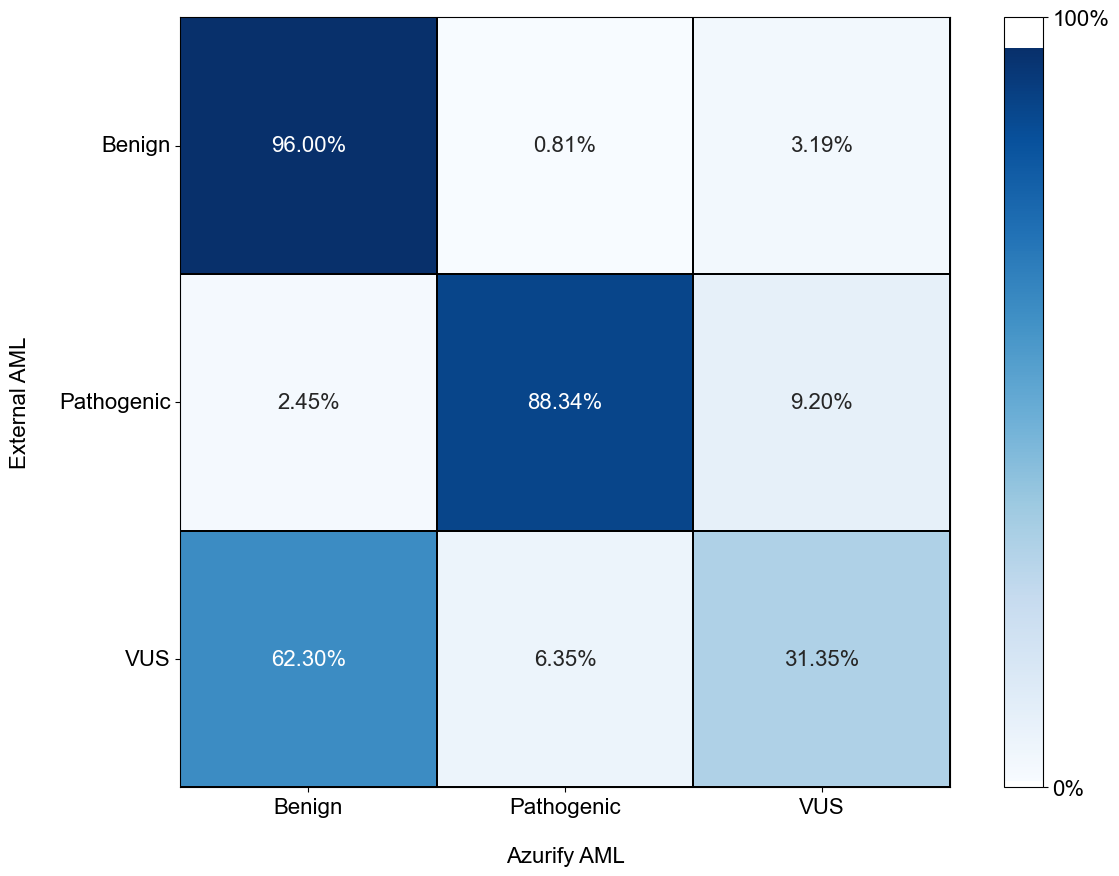

In [168]:
# figure size in inches
rcParams['figure.figsize'] = 14,10
plt.rcParams['font.size'] = 16
plt.rcParams["font.family"] = "Arial"
df = pd.DataFrame(aml, columns=['EXT_CATEGORIZATION','Pathogenicity'])
df.replace(['Likely Pathogenic', 'Likely Benign'], ['Pathogenic', 'Benign'], inplace=True)
df.sort_values(by=['EXT_CATEGORIZATION'])
fmt = lambda x,pos: '{:.0%}'.format(x)
confusion_matrix = pd.crosstab(df['EXT_CATEGORIZATION'], df['Pathogenicity'], rownames=['External AML\n'], colnames=['\nAzurify AML']).apply(lambda r: r/r.sum(), axis=1)
res=sns.heatmap(confusion_matrix,annot=True, 
          fmt=".2%", cmap="Blues", cbar=False,square=True,  linewidths=0.1, linecolor='black')
for _, spine in res.spines.items():
    spine.set_visible(True)
cbar = res.figure.colorbar(res.collections[0])
cbar.set_ticks([0, 1])
cbar.set_ticklabels(["0%", "100%"])
plt.yticks(rotation=0)
plt.savefig('ext_lung.pdf',bbox_inches='tight',dpi=600)
plt.show()

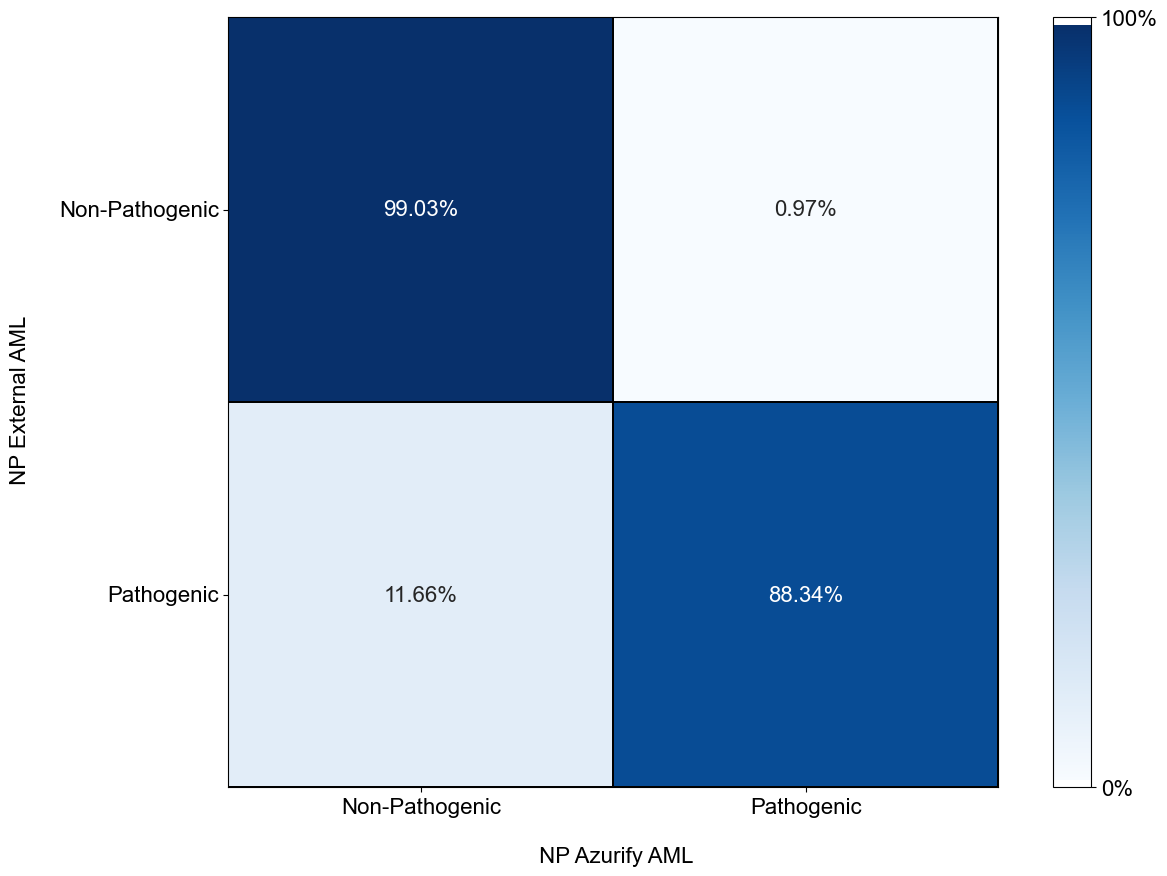

In [169]:
#same figures but as path vs non-path
# figure size in inches
rcParams['figure.figsize'] = 14,10
plt.rcParams['font.size'] = 16
plt.rcParams["font.family"] = "Arial"
df = pd.DataFrame(aml, columns=['EXT_CATEGORIZATION','Pathogenicity'])
df.replace(['Likely Pathogenic', 'Likely Benign', 'Benign', 'VUS'], ['Pathogenic', 'Non-Pathogenic', 'Non-Pathogenic', 'Non-Pathogenic'], inplace=True)
df.sort_values(by=['EXT_CATEGORIZATION'])
fmt = lambda x,pos: '{:.0%}'.format(x)
confusion_matrix = pd.crosstab(df['EXT_CATEGORIZATION'], df['Pathogenicity'], rownames=[' NP External AML\n'], colnames=['\n NP Azurify AML']).apply(lambda r: r/r.sum(), axis=1)
res=sns.heatmap(confusion_matrix,annot=True, 
          fmt=".2%", cmap="Blues", cbar=False,square=True,  linewidths=0.1, linecolor='black')
for _, spine in res.spines.items():
    spine.set_visible(True)
cbar = res.figure.colorbar(res.collections[0])
cbar.set_ticks([0, 1])
cbar.set_ticklabels(["0%", "100%"])
plt.yticks(rotation=0)
plt.savefig('ext_aml_np.pdf',bbox_inches='tight',dpi=600)
plt.show()

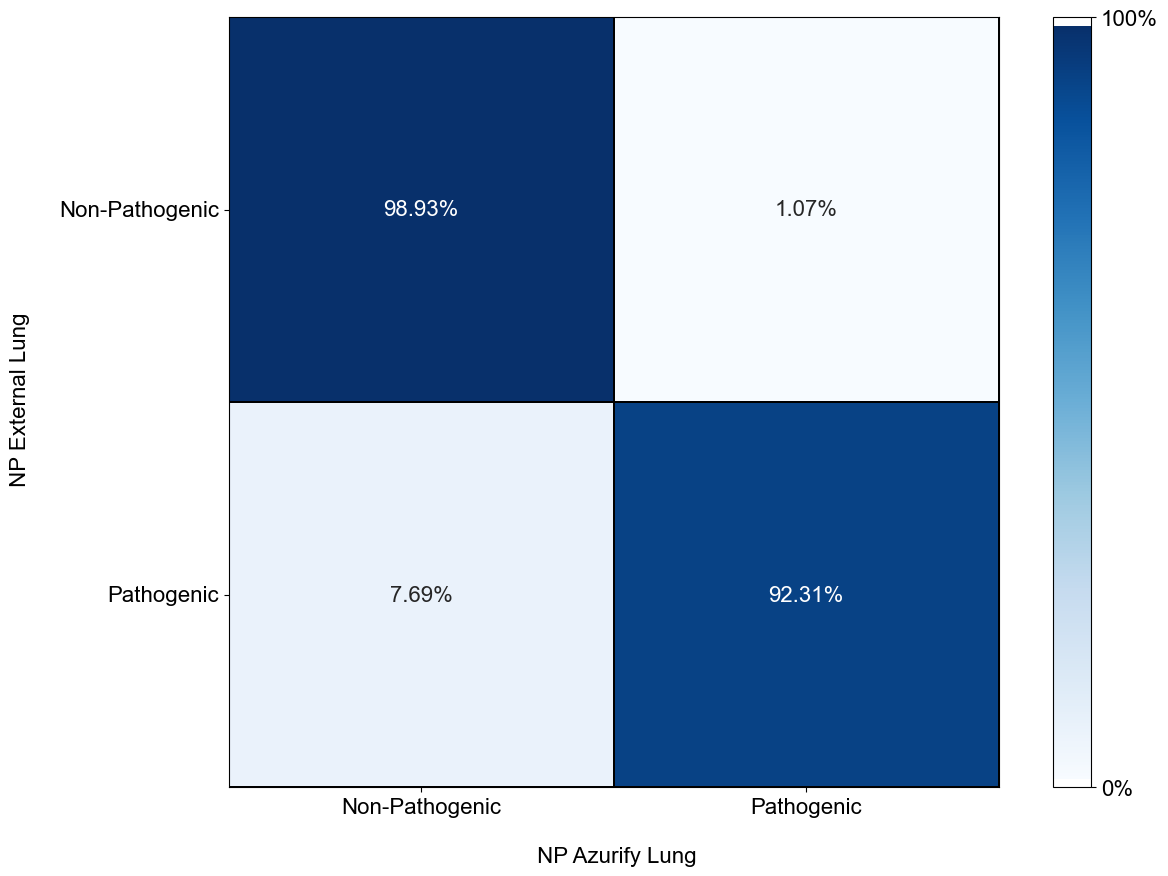

In [170]:
#same figures but as path vs non-path
# figure size in inches
rcParams['figure.figsize'] = 14,10
plt.rcParams['font.size'] = 16
plt.rcParams["font.family"] = "Arial"
df = pd.DataFrame(lung, columns=['EXT_CATEGORIZATION','Pathogenicity'])
df.replace(['Likely Pathogenic', 'Likely Benign', 'Benign', 'VUS'], ['Pathogenic', 'Non-Pathogenic', 'Non-Pathogenic', 'Non-Pathogenic'], inplace=True)
df.sort_values(by=['EXT_CATEGORIZATION'])
fmt = lambda x,pos: '{:.0%}'.format(x)
confusion_matrix = pd.crosstab(df['EXT_CATEGORIZATION'], df['Pathogenicity'], rownames=[' NP External Lung\n'], colnames=['\n NP Azurify Lung']).apply(lambda r: r/r.sum(), axis=1)
res=sns.heatmap(confusion_matrix,annot=True, 
          fmt=".2%", cmap="Blues", cbar=False,square=True,  linewidths=0.1, linecolor='black')
for _, spine in res.spines.items():
    spine.set_visible(True)
cbar = res.figure.colorbar(res.collections[0])
cbar.set_ticks([0, 1])
cbar.set_ticklabels(["0%", "100%"])
plt.yticks(rotation=0)
plt.savefig('ext_lung_np.pdf',bbox_inches='tight',dpi=600)
plt.show()

In [ ]:
# figure size in inches
rcParams['figure.figsize'] = 14,10
plt.rcParams['font.size'] = 16
plt.rcParams["font.family"] = "Arial"
df = pd.DataFrame(uc_uab, columns=['UC_CATEGORIZATION','UAB_CATEGORIZATION'])
df.replace(['Likely Pathogenic', 'Likely Benign', 'Benign', 'VUS'], ['Pathogenic', 'Non-Pathogenic', 'Non-Pathogenic', 'Non-Pathogenic'], inplace=True)
df.sort_values(by=['UC_CATEGORIZATION'])
fmt = lambda x,pos: '{:.0%}'.format(x)
confusion_matrix = pd.crosstab(df['UC_CATEGORIZATION'], df['UAB_CATEGORIZATION'], rownames=['UC ALL\n'], colnames=['\nUAB ALL']).apply(lambda r: r/r.sum(), axis=1)
res=sns.heatmap(confusion_matrix,annot=True, 
          fmt=".2%", cmap="Blues", cbar=False,square=True,  linewidths=0.1, linecolor='black')
for _, spine in res.spines.items():
    spine.set_visible(True)
cbar = res.figure.colorbar(res.collections[0])
cbar.set_ticks([0, 1])
cbar.set_ticklabels(["0%", "100%"])
plt.yticks(rotation=0)
plt.savefig('UC_UAB_ALL_np.pdf',bbox_inches='tight',dpi=600)
plt.show()

In [172]:
len(uc_uab['GENE_y'].unique())    

29

In [ ]:
# the final figure we develop should be concordant variants between UAB and UChicago run through Azurify
# to generate that we need to merge the two dataframes and then filter for the concordant variants

uc_aml = uc_aml.copy()
uc_aml['CAT_KEY'] = uc_aml['KEY'] + ':' + uc_aml['UC_CATEGORIZATION']
uab_aml['CAT_KEY'] = uab_aml['KEY'] + ':' + uab_aml['UAB_CATEGORIZATION']

uc_aml.rename(columns={'UC_CATEGORIZATION': 'EXT_CATEGORIZATION'}, inplace=True)
uab_aml.rename(columns={'UAB_CATEGORIZATION': 'EXT_CATEGORIZATION'}, inplace=True)

uc_aml_filtered = uc_aml[uc_aml['CAT_KEY'].isin(uab_aml['CAT_KEY'])]
uba_aml_filtered = uab_aml[uab_aml['CAT_KEY'].isin(uc_aml['CAT_KEY'])]

#concordant aml variants
c_aml = pd.concat([uc_aml_filtered, uba_aml_filtered], ignore_index=True)


In [ ]:
#same figures but as path vs non-path
# figure size in inches
rcParams['figure.figsize'] = 14,10
plt.rcParams['font.size'] = 16
plt.rcParams["font.family"] = "Arial"
df = pd.DataFrame(c_aml, columns=['EXT_CATEGORIZATION','Pathogenicity'])
df.replace(['Likely Pathogenic', 'Likely Benign', 'Benign', 'VUS'], ['Pathogenic', 'Non-Pathogenic', 'Non-Pathogenic', 'Non-Pathogenic'], inplace=True) # comment this line out to show babak's original labels
df.sort_values(by=['EXT_CATEGORIZATION'])
fmt = lambda x,pos: '{:.0%}'.format(x)
confusion_matrix = pd.crosstab(df['EXT_CATEGORIZATION'], df['Pathogenicity'], rownames=['Concordant AML Variants\n'], colnames=['\nAzurify Classifications']).apply(lambda r: r/r.sum(), axis=1)
res=sns.heatmap(confusion_matrix,annot=True, 
          fmt=".2%", cmap="Blues", cbar=False,square=True,  linewidths=0.1, linecolor='black')
for _, spine in res.spines.items():
    spine.set_visible(True)
cbar = res.figure.colorbar(res.collections[0])
cbar.set_ticks([0, 1])
cbar.set_ticklabels(["0%", "100%"])
plt.yticks(rotation=0)
plt.savefig('concordant_path_amls.pdf',bbox_inches='tight',dpi=600)
plt.show()

In [ ]:
# the final figure we develop should be concordant variants between UAB and UChicago run through Azurify
# to generate that we need to merge the two dataframes and then filter for the concordant variants

uc_lung = uc_lung.copy()
uc_lung['CAT_KEY'] = uc_lung['KEY'] + ':' + uc_lung['UC_CATEGORIZATION']
uab_lung['CAT_KEY'] = uab_lung['KEY'] + ':' + uab_lung['UAB_CATEGORIZATION']

uc_lung.rename(columns={'UC_CATEGORIZATION': 'EXT_CATEGORIZATION'}, inplace=True)
uab_lung.rename(columns={'UAB_CATEGORIZATION': 'EXT_CATEGORIZATION'}, inplace=True)

uc_lung_filtered = uc_lung[uc_lung['CAT_KEY'].isin(uab_lung['CAT_KEY'])]
uba_lung_filtered = uab_lung[uab_lung['CAT_KEY'].isin(uc_lung['CAT_KEY'])]

#concordant lung variants
c_lung = pd.concat([uc_lung_filtered, uba_lung_filtered], ignore_index=True)


In [ ]:
#same figures but as path vs non-path
# figure size in inches
rcParams['figure.figsize'] = 14,10
plt.rcParams['font.size'] = 16
plt.rcParams["font.family"] = "Arial"
df = pd.DataFrame(c_lung, columns=['EXT_CATEGORIZATION','Pathogenicity'])
df.replace(['Likely Pathogenic', 'Likely Benign', 'Benign', 'VUS'], ['Pathogenic', 'Non-Pathogenic', 'Non-Pathogenic', 'Non-Pathogenic'], inplace=True) # comment this line out to show babak's original labels
df.sort_values(by=['EXT_CATEGORIZATION'])
fmt = lambda x,pos: '{:.0%}'.format(x)
confusion_matrix = pd.crosstab(df['EXT_CATEGORIZATION'], df['Pathogenicity'], rownames=['Concordant Lung Variants\n'], colnames=['\nAzurify Classifications']).apply(lambda r: r/r.sum(), axis=1)
res=sns.heatmap(confusion_matrix,annot=True, 
          fmt=".2%", cmap="Blues", cbar=False,square=True,  linewidths=0.1, linecolor='black')
for _, spine in res.spines.items():
    spine.set_visible(True)
cbar = res.figure.colorbar(res.collections[0])
cbar.set_ticks([0, 1])
cbar.set_ticklabels(["0%", "100%"])
plt.yticks(rotation=0)
plt.savefig('concordant_path_lung.pdf',bbox_inches='tight',dpi=600)
plt.show()